In [1]:
#importing the libraries

import numpy as np
import matplotlib.pyplot as plt
from random import randrange
import pandas as pd

In [2]:
# reading and shuffling the data

difference = 0
df = pd.read_csv("FoDS-A1.csv")
df = df.sample(frac = 1)

In [3]:
# normalising the data values
myData = (df - df.min()) / (df.max() - df.min())

X = myData.iloc[:, :-1].to_numpy()
X1 = myData.iloc[:, 0:1].to_numpy() # strength
X2 = myData.iloc[:, 1:2].to_numpy() # temperature
Y = myData.iloc[:, -1:].to_numpy()

# splitting the dataset into training data and testing data

splitData = int(0.7 * len(myData))
train_X, test_X, train_X1, test_X1, train_X2, test_X2, train_Y, test_Y = X[:splitData], X[splitData:], X1[:splitData], X1[splitData:], X2[:splitData], X2[splitData:], Y[:splitData], Y[splitData:]

In [4]:
#setting parameters of the model

maxDegGD = 9
maxDegSGD = 9

iter_value = 500
iter_value += 1
skip_num = 50
iter_scaled= int(((iter_value-1)/skip_num)+1)

lamdaCountGD = 5
lamdaCountSGD = 5

lamdaCountGD += 1
lamdaCountSGD += 1

lamdaSegmentGD = 50
lamdaSegmentSGD = 50

learningRateGD = 0.1
learningRateSGD = 0.1

coeff_list_GD = np.zeros((maxDegGD+1, lamdaCountGD + 1, maxDegGD+1, maxDegGD+1))
coeff_list_SGD = np.zeros((maxDegSGD+1, lamdaCountSGD + 1, maxDegSGD+1, maxDegSGD+1))

error_array_GD = np.zeros((maxDegGD+1, lamdaCountGD + 1, iter_scaled))
error_array_SGD = np.zeros((maxDegSGD+1, lamdaCountSGD + 1, iter_scaled))

In [5]:
def Lasso_GD(deg, X1, X2, Y, lamda, learning_rate, iterations):
    
    lamdaScaled = int(lamda*lamdaSegmentGD)
    
    # assigning random values for weights
    A = np.zeros((deg+1, deg+1))
    for m in range(deg+1):
        for n in range(deg+1-m):
            A[m][n] = np.random.randn()
                
    for itr in range(iterations):
        sumItrError = 0
        sum_coeff = 0
        eachIFErrorList = []
        
        for m in range(deg+1):
            for n in range(deg+1-m):
                sum_coeff += A[m][n]

        for z in range(len(Y)):    # for each row in input data
            row1 = X1[z]                  # contains strength
            row2 = X2[z]                 # contains temperature
            column = Y[z]              # contains pressure
            eachIFError = 0           # variable for calculating error in each iteration
            
            for m in range(deg+1):                    # power of x1
                for n in range(deg+1-m):            # power of x2
                    eachIFError += A[m][n]*(row1**m) * (row2**n)    # summation of (w0+ w1*x1 + w2*x1^2 + w3*x1*x2 + w4*x2^2 ...)
                    
            eachIFError -= column                    # (w0 + w1*x1 + w2*x1^2 + w3*x1*x2 + w4*x2^2 ...) - yn 
            eachIFErrorList.append(eachIFError)
            sumItrError +=  (eachIFError**2)*0.5              

        sumItrError += (lamda) * sum_coeff
        sumItrError = (sumItrError/len(Y))**0.5
        
        for m in range(deg+1):
            for n in range(deg+1-m): 
                subSum = 0
                for z in range(len(Y)):
                    row1 = X1[z]
                    row2 = X2[z]
                    subSum += eachIFErrorList[z] * (row1**m) * (row2**n)
                if A[m][n] < 0:
                    A[m][n] -= (learning_rate/len(Y))  * (subSum + lamda * -1)
                else:
                    A[m][n] -= (learning_rate/len(Y))  * (subSum + lamda * 1)

        if(itr%skip_num == 0):
            index = int(itr/skip_num)
            error_array_GD[deg][lamdaScaled][index] = sumItrError
            print("Error of ", itr ," iteration = " ,sumItrError)

        if(itr == iterations - 1): 
            print("\nError of end of iteration for lambda = ", lamda, "\n\t\t\t = " ,sumItrError)   
            
            for m in range(deg+1):             
                for n in range(deg+1-m):
                    coeff_list_GD[deg][lamdaScaled][m][n] = A[m][n]
    return sumItrError


ERRORS FOR LAMBDA =  0.02 

Error of  0  iteration =  [1.96955008]
Error of  50  iteration =  [0.36339976]
Error of  100  iteration =  [0.28531315]
Error of  150  iteration =  [0.23934923]
Error of  200  iteration =  [0.21252865]
Error of  250  iteration =  [0.19633122]
Error of  300  iteration =  [0.18574139]
Error of  350  iteration =  [0.17808079]
Error of  400  iteration =  [0.17200195]
Error of  450  iteration =  [0.16684595]
Error of  500  iteration =  [0.16229147]

Error of end of iteration for lambda =  0.02 
			 =  [0.16229147]


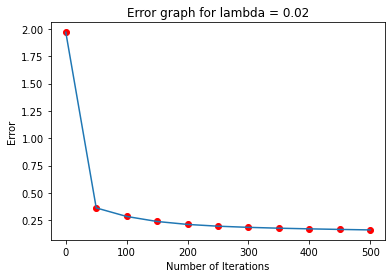

----------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------

ERRORS FOR LAMBDA =  0.04 

Error of  0  iteration =  [0.90000865]
Error of  50  iteration =  [0.42403188]
Error of  100  iteration =  [0.28718591]
Error of  150  iteration =  [0.21936802]
Error of  200  iteration =  [0.18792157]
Error of  250  iteration =  [0.17320675]
Error of  300  iteration =  [0.16541339]
Error of  350  iteration =  [0.16040497]
Error of  400  iteration =  [0.15658579]
Error of  450  iteration =  [0.15335773]
Error of  500  iteration =  [0.15049094]

Error of end of iteration for lambda =  0.04 
			 =  [0.15049094]


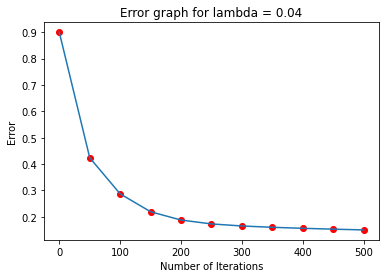

----------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------

ERRORS FOR LAMBDA =  0.06 

Error of  0  iteration =  [1.49110729]
Error of  50  iteration =  [0.28840266]
Error of  100  iteration =  [0.23643131]
Error of  150  iteration =  [0.21235968]
Error of  200  iteration =  [0.19986463]
Error of  250  iteration =  [0.19195121]
Error of  300  iteration =  [0.18593306]
Error of  350  iteration =  [0.18080631]
Error of  400  iteration =  [0.17620778]
Error of  450  iteration =  [0.17199782]
Error of  500  iteration =  [0.16811567]

Error of end of iteration for lambda =  0.06 
			 =  [0.16811567]


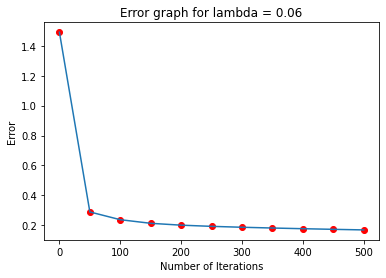

----------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------

ERRORS FOR LAMBDA =  0.08 

Error of  0  iteration =  [2.1505227]
Error of  50  iteration =  [0.30387439]
Error of  100  iteration =  [0.25118044]
Error of  150  iteration =  [0.22505111]
Error of  200  iteration =  [0.21057205]
Error of  250  iteration =  [0.20104017]
Error of  300  iteration =  [0.19370663]
Error of  350  iteration =  [0.18746843]
Error of  400  iteration =  [0.18189839]
Error of  450  iteration =  [0.17683257]
Error of  500  iteration =  [0.17216804]

Error of end of iteration for lambda =  0.08 
			 =  [0.17216804]


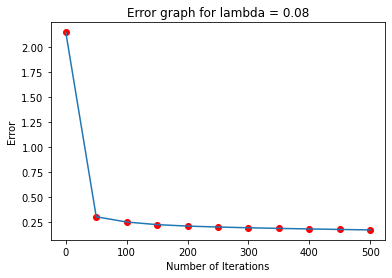

----------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------

ERRORS FOR LAMBDA =  0.1 

Error of  0  iteration =  [1.06287395]
Error of  50  iteration =  [0.3732827]
Error of  100  iteration =  [0.27760566]
Error of  150  iteration =  [0.23009194]
Error of  200  iteration =  [0.20649935]
Error of  250  iteration =  [0.1938924]
Error of  300  iteration =  [0.186118]
Error of  350  iteration =  [0.18051809]
Error of  400  iteration =  [0.17598772]
Error of  450  iteration =  [0.1720634]
Error of  500  iteration =  [0.1685453]

Error of end of iteration for lambda =  0.1 
			 =  [0.1685453]


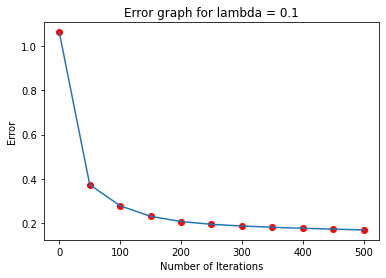

----------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------


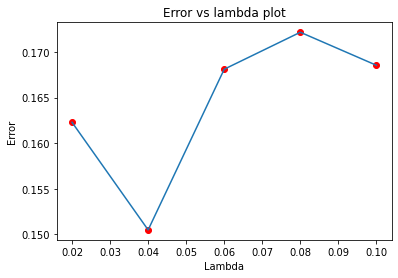


Lambda =  0.04  gives minimum error.


In [6]:
#For training data

minError = 100000
minErrorDeg = -1
minErrorLamda = -1

x_axis_GD=[]
lamdaGD = []
lamdaErrorList = []

for i in range(lamdaCountGD):
    if i == 0:
        continue
    lamdaGD.append(i/lamdaSegmentGD)
    
    
for i in range(iter_scaled):
    x_axis_GD.append(i*skip_num)

for iterLamda in lamdaGD:
    
    lamdaScaled = int(iterLamda*lamdaSegmentGD)
    x_axis_GD=[]
    
    for i in range(iter_scaled):
        x_axis_GD.append(i*skip_num)

    
    for i in range(maxDegGD+1):
        if i != maxDegGD:
            continue
        
        print("\nERRORS FOR LAMBDA = ", iterLamda, "\n")
        GD_Error = Lasso_GD(i, X1, X2, train_Y, iterLamda, learningRateGD , iter_value)
        lamdaErrorList.append(GD_Error)
        if(GD_Error <= minError):
            minError = GD_Error
            minErrorDeg = i
            minErrorLamda = iterLamda

        error_list = error_array_GD[i][lamdaScaled].tolist()
        
        plt.plot(x_axis_GD, error_list)
        plt.scatter(x_axis_GD, error_list, marker='o', color='red')
        plt.xlabel('Number of Iterations')
        plt.ylabel('Error')
        title = "Error graph for lambda = " + str(iterLamda)
        plt.title(title)
        plt.show()
        print("----------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------")

plt.plot(lamdaGD, lamdaErrorList)
plt.scatter(lamdaGD, lamdaErrorList, marker='o', color='red')
plt.xlabel('Lambda')
plt.ylabel('Error')
title = "Error vs lambda plot"
plt.title(title)
plt.show()
        
print("\nLambda = ", minErrorLamda, " gives minimum error.")

In [7]:
def Predict_Lasso_GD(deg, X1, X2, Y, lamda):
    
    lamdaScaled = int(lamda*lamdaSegmentGD)
    sum_coeff = 0
    totalTestingError = 0
    
    for m in range(deg+1):
        for n in range(deg+1-m):
            sum_coeff += coeff_list_GD[deg][lamdaScaled][m][n]
    
    for z in range(len(Y)):    # for each row in input data
        row1 = X1[z]                  # contains strength
        row2 = X2[z]                 # contains temperature
        column = Y[z]              # contains pressure
        testingError = 0
                        
        for m in range(deg+1):                    # power of x1
            for n in range(deg+1-m):            # power of x2
                testingError += coeff_list_GD[deg][lamdaScaled][m][n] * (row1**m) * (row2**n)    # summation of (w0+ w1*x1 + w2*x1^2 + w3*x1*x2 + w4*x2^2 ...)
                    
        testingError -= column                       # yn - (w0 + w1*x1 + w2*x1^2 + w3*x1*x2 + w4*x2^2 ...)     
        totalTestingError +=  (testingError**2)*0.5  
    totalTestingError +=  lamda * sum_coeff     
    totalTestingError = (totalTestingError/len(Y))**0.5
    
    print("Testing error = " ,totalTestingError, "\n")
            
    return totalTestingError

TESTING FOR LAMBDA =  0.02
Testing error =  [0.16229337] 

TESTING FOR LAMBDA =  0.04
Testing error =  [0.14794582] 

TESTING FOR LAMBDA =  0.06
Testing error =  [0.16679283] 

TESTING FOR LAMBDA =  0.08
Testing error =  [0.1683698] 

TESTING FOR LAMBDA =  0.1
Testing error =  [0.1619309] 



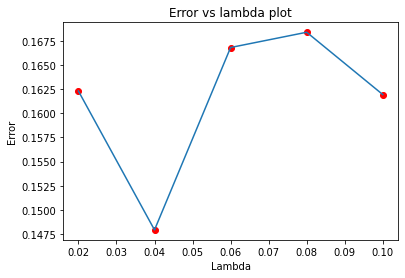


Lambda =  0.04  gives minimum error.


In [8]:
lamdaErrorList.clear()
for iterLamda in lamdaGD:
    for i in range(maxDegGD+1):
        if(i != maxDegGD):
            continue
        print("TESTING FOR LAMBDA = ", iterLamda)
        GD_Error = Predict_Lasso_GD(i, test_X1, test_X2, test_Y, iterLamda)
        lamdaErrorList.append(GD_Error)
        if(GD_Error < minError):
            minError = GD_Error
            minErrorLamda = iterLamda

plt.plot(lamdaGD, lamdaErrorList)
plt.scatter(lamdaGD, lamdaErrorList, marker='o', color='red')
plt.xlabel('Lambda')
plt.ylabel('Error')
title = "Error vs lambda plot"
plt.title(title)
plt.show()
print("\nLambda = ", minErrorLamda, " gives minimum error.")  

In [9]:
def Lasso_SGD(deg, X1, X2, Y, lamda, learning_rate, iterations):
    
    lamdaScaled = int(lamda*lamdaSegmentSGD)
    
    # assigning random values for weights
    A = np.zeros((deg+1, deg+1))
    for m in range(deg+1):
            for n in range(deg+1-m):
                A[m][n] = np.random.randn()
                
    for itr in range(iterations):
        sum_coeff = 0
        
        for m in range(deg+1):
            for n in range(deg+1-m):
                sum_coeff += A[m][n]
            
        sumItrError = 0
        
        for z in range(len(Y)):    # for each row in input data
            row1 = X1[z]              # contains strength, temperature
            row2 = X2[z]
            column = Y[z]       # contains pressure
            
            dotP_wx = 0                # variable for calculating error in each iteration
            
            for m in range(deg+1):                    # power of x1
                for n in range(deg+1-m):            # power of x2
                    dotP_wx += A[m][n] * (row1**m) * (row2**n)    # summation of (w0+ w1*x1 + w2*x1^2 + w3*x1*x2 + w4*x2^2 ...)
                    
            dotP_wx -= column                    # yn - (w0 + w1*x1 + w2*x1^2 + w3*x1*x2 + w4*x2^2 ...) 
            
            # for each parameter(w0,w1,w2,...)    
            for m in range(deg+1):                   # power of x1
                for n in range(deg+1-m):             # power of x2
                    if A[m][n] < 0:
                        A[m][n] -= (learning_rate/len(Y)) * (dotP_wx * (row1**m) * (row2**n) + lamda * -1)
                    else:
                        A[m][n] -= (learning_rate/len(Y)) * (dotP_wx * (row1**m) * (row2**n) + lamda * 1)
        
        for z in range(len(Y)):    # for each row in input data
            row1 = X1[z]                  # contains strength, temperature
            row2 = X2[z]
            column = Y[z]
            dotP_wx = 0                # variable for calculating error in each iteration
            
            for m in range(deg+1):                    # power of x1
                for n in range(deg+1-m):            # power of x2
                    dotP_wx += A[m][n] * (row1**m) * (row2**n)    # summation of (w0+ w1*x1 + w2*x1^2 + w3*x1*x2 + w4*x2^2 ...)
                    
            dotP_wx -= column                   # Summation of [(w0 + w1*x1 + w2*x1^2 + w3*x1*x2 + w4*x2^2 ...) - yn]
            sumItrError +=  (dotP_wx**2)*0.5
            
        sumItrError =  (sumItrError + lamda * sum_coeff)
        sumItrError = (sumItrError/len(Y))**0.5
        
        if(itr%skip_num == 0):
            index = int(itr/skip_num)
            error_array_SGD[deg][lamdaScaled][index] = sumItrError
            print("Error of ", itr ," iteration = " ,sumItrError)
        
        if(itr == iterations - 1):
            print("\nError of last iteration for lambda = ", lamda, "\n\t\t\t = " ,sumItrError)
            for m in range(deg+1):                   # power of x1
                for n in range(deg+1-m):
                    coeff_list_SGD[deg][lamdaScaled][m][n] = A[m][n]
    return sumItrError


ERRORS FOR LAMBDA =  0.02 

Error of  0  iteration =  [0.97833706]
Error of  50  iteration =  [0.26575676]
Error of  100  iteration =  [0.23616571]
Error of  150  iteration =  [0.21646659]
Error of  200  iteration =  [0.21221729]
Error of  250  iteration =  [0.21217115]
Error of  300  iteration =  [0.21274293]
Error of  350  iteration =  [0.21325149]
Error of  400  iteration =  [0.21402004]
Error of  450  iteration =  [0.21471406]
Error of  500  iteration =  [0.2160114]

Error of last iteration for lambda =  0.02 
			 =  [0.2160114]


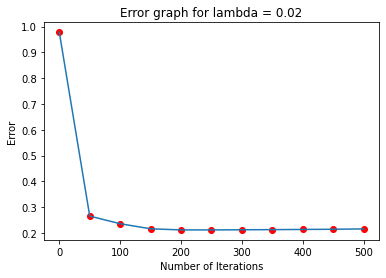


ERRORS FOR LAMBDA =  0.04 

Error of  0  iteration =  [1.56567586]
Error of  50  iteration =  [0.25714259]
Error of  100  iteration =  [0.22050071]
Error of  150  iteration =  [0.21688302]
Error of  200  iteration =  [0.22419638]
Error of  250  iteration =  [0.2281919]
Error of  300  iteration =  [0.23051268]
Error of  350  iteration =  [0.2298303]
Error of  400  iteration =  [0.23176262]
Error of  450  iteration =  [0.23558428]
Error of  500  iteration =  [0.24018046]

Error of last iteration for lambda =  0.04 
			 =  [0.24018046]


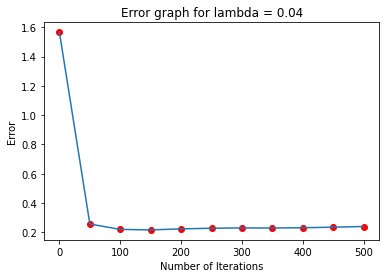


ERRORS FOR LAMBDA =  0.06 

Error of  0  iteration =  [1.57432721]
Error of  50  iteration =  [0.39246243]
Error of  100  iteration =  [0.31049303]
Error of  150  iteration =  [0.27669929]
Error of  200  iteration =  [0.2520379]
Error of  250  iteration =  [0.241259]
Error of  300  iteration =  [0.23014328]
Error of  350  iteration =  [0.23636835]
Error of  400  iteration =  [0.24426466]
Error of  450  iteration =  [0.24640639]
Error of  500  iteration =  [0.24643107]

Error of last iteration for lambda =  0.06 
			 =  [0.24643107]


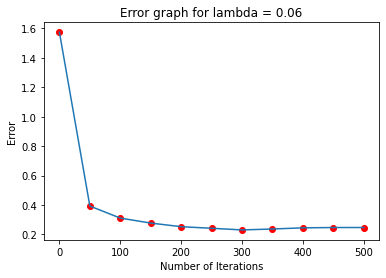


ERRORS FOR LAMBDA =  0.08 

Error of  0  iteration =  [1.13935425]
Error of  50  iteration =  [0.29849898]
Error of  100  iteration =  [0.21293472]
Error of  150  iteration =  [0.20626843]
Error of  200  iteration =  [0.219747]
Error of  250  iteration =  [0.24524881]
Error of  300  iteration =  [0.24992191]
Error of  350  iteration =  [0.24927361]
Error of  400  iteration =  [0.24927011]
Error of  450  iteration =  [0.24927077]
Error of  500  iteration =  [0.24927071]

Error of last iteration for lambda =  0.08 
			 =  [0.24927071]


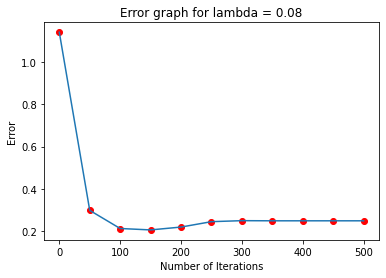


ERRORS FOR LAMBDA =  0.1 

Error of  0  iteration =  [1.35177986]
Error of  50  iteration =  [0.32366998]
Error of  100  iteration =  [0.25823609]
Error of  150  iteration =  [0.25334207]
Error of  200  iteration =  [0.26491508]
Error of  250  iteration =  [0.2607573]
Error of  300  iteration =  [0.25356129]
Error of  350  iteration =  [0.25287249]
Error of  400  iteration =  [0.25286761]
Error of  450  iteration =  [0.25286805]
Error of  500  iteration =  [0.25286799]

Error of last iteration for lambda =  0.1 
			 =  [0.25286799]


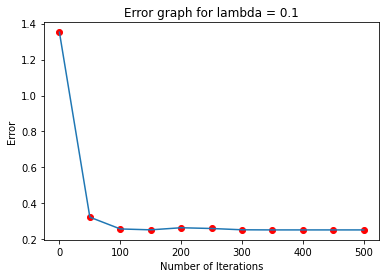

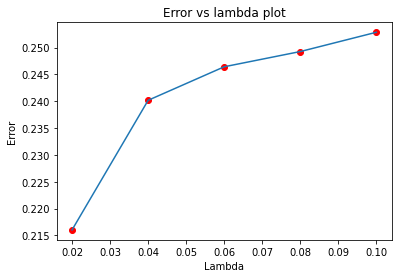


Lambda =  0.04  gives minimum error.


In [10]:
# For training data

minError = 100000
minErrorDeg = -1
x_axis_SGD=[]

lamdaSGD = []
lamdaErrorList.clear()

for i in range(lamdaCountSGD):
    if i == 0:
        continue
    lamdaSGD.append(i/lamdaSegmentSGD)
    
    
for i in range(iter_scaled):
    x_axis_SGD.append(i*skip_num)

for iterLamda in lamdaSGD:
    lamdaScaled = int(iterLamda*lamdaSegmentSGD)
    
    for i in range(maxDegSGD+1):
        if i != maxDegSGD:
            continue
        print("\nERRORS FOR LAMBDA = ", iterLamda, "\n")

        SGD_Error = Lasso_SGD(i, X1, X2, train_Y, iterLamda, learningRateSGD, iter_value)
        lamdaErrorList.append(SGD_Error)

        error_list = error_array_SGD[i][lamdaScaled].tolist()
        plt.plot(x_axis_SGD, error_list)
        plt.scatter(x_axis_SGD, error_list, marker='o', color='red')
        plt.xlabel('Number of Iterations')
        plt.ylabel('Error')
        title = "Error graph for lambda = " + str(iterLamda)
        plt.title(title)
        plt.show()

plt.plot(lamdaSGD, lamdaErrorList)
plt.scatter(lamdaSGD, lamdaErrorList, marker='o', color='red')
plt.xlabel('Lambda')
plt.ylabel('Error')
title = "Error vs lambda plot"
plt.title(title)
plt.show()
print("\nLambda = ", minErrorLamda, " gives minimum error.")

In [11]:
def Predict_Lasso_GD(deg, X1, X2, Y, lamda):
    
    lamdaScaled = int(lamda*lamdaSegmentSGD)
    sum_coeff = 0
    totalTestingError = 0
    
    for m in range(deg+1):
        for n in range(deg+1-m):
            sum_coeff += coeff_list_SGD[deg][lamdaScaled][m][n]
    
    for z in range(len(Y)):    # for each row in input data
        row1 = X1[z]                  # contains strength
        row2 = X2[z]                 # contains temperature
        column = Y[z]              # contains pressure
        testingError = 0
                        
        for m in range(deg+1):                    # power of x1
            for n in range(deg+1-m):            # power of x2
                testingError += coeff_list_SGD[deg][lamdaScaled][m][n] * (row1**m) * (row2**n)    # summation of (w0+ w1*x1 + w2*x1^2 + w3*x1*x2 + w4*x2^2 ...)
                    
        testingError -= column                       # yn - (w0 + w1*x1 + w2*x1^2 + w3*x1*x2 + w4*x2^2 ...)     
        totalTestingError +=  (testingError**2)*0.5  
    totalTestingError +=  lamda * sum_coeff
    totalTestingError = (totalTestingError/len(Y))**0.5
    
    print("Testing error = " ,totalTestingError, "\n")
            
    return totalTestingError

TESTING ERRORS FOR LAMBDA =  0.02
Testing error =  [0.21049715] 

TESTING ERRORS FOR LAMBDA =  0.04
Testing error =  [0.23679681] 

TESTING ERRORS FOR LAMBDA =  0.06
Testing error =  [0.24483846] 

TESTING ERRORS FOR LAMBDA =  0.08
Testing error =  [0.2484224] 

TESTING ERRORS FOR LAMBDA =  0.1
Testing error =  [0.25274339] 



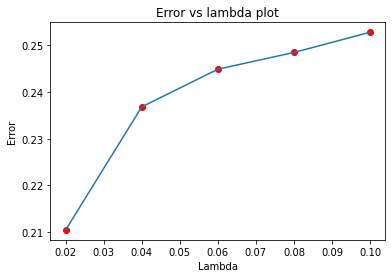


Lambda =  0.02  gives minimum error.


In [12]:
lamdaErrorList.clear()
for iterLamda in lamdaSGD:
    for i in range(maxDegSGD+1):
        if(i != maxDegSGD):
            continue
        print("TESTING ERRORS FOR LAMBDA = ", iterLamda)
        GD_Error = Predict_Lasso_GD(i, test_X1, test_X2, test_Y, iterLamda)
        lamdaErrorList.append(GD_Error)
        if(GD_Error < minError):
            minError = GD_Error
            minErrorLamda = iterLamda
        
plt.plot(lamdaGD, lamdaErrorList)
plt.scatter(lamdaGD, lamdaErrorList, marker='o', color='red')
plt.xlabel('Lambda')
plt.ylabel('Error')
title = "Error vs lambda plot"
plt.title(title)
plt.show()
print("\nLambda = ", minErrorLamda, " gives minimum error.") 